In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
from os import listdir
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, roc_auc_score, roc_curve
from glob import glob

import pickle
import time
from sklearn import cluster, metrics
from sklearn import manifold, decomposition

import logging

logging.disable(logging.WARNING) # disable WARNING, INFO and DEBUG logging everywhere

# Exploration / Nettoyage / Features

Importation et exploration des données.

In [2]:
raw_data = pd.read_csv('Flipkart/flipkart_com-ecommerce_sample_1050.csv')

path_img = 'Flipkart/Images/'

raw_data.shape

(1050, 15)

In [3]:
raw_data.head(5)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [4]:
raw_data.info

<bound method DataFrame.info of                                uniq_id            crawl_timestamp  \
0     55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1     7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2     64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3     d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4     6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   
...                                ...                        ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc  2015-12-01 10:15:43 +0000   
1046  fd6cbcc22efb6b761bd564c28928483c  2015-12-01 10:15:43 +0000   
1047  5912e037d12774bb73a2048f35a00009  2015-12-01 10:15:43 +0000   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6  2015-12-01 10:15:43 +0000   
1049  f2f027ad6a6df617c9f125173da71e44  2015-12-01 10:15:43 +0000   

                                            product_url  \
0     http://www.flipkart.com/elegance-polyester-mul...   
1     http://www.flip

In [5]:
raw_data.isna().sum()

uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       1
dtype: int64

In [6]:
raw_data.nunique()

uniq_id                    1050
crawl_timestamp             149
product_url                1050
product_name               1050
product_category_tree       642
pid                        1050
retail_price                354
discounted_price            424
image                      1050
is_FK_Advantage_product       2
description                1050
product_rating               27
overall_rating               27
brand                       490
product_specifications      984
dtype: int64

Le but étant de deviner la catégorie à partir de la description et/ou de l'image, les seules colonnes qui nous importent sont 'product_category_tree', 'image' et 'description'. Je rajoute également 'product_name' simplement pour avoir une idée du produit en question.    
Il n'y a pas de valeurs manquantes sur ces features et on a bien 1050 valeurs uniques sauf pour la catégorie.

In [7]:
data_ALL = raw_data[['product_name', 'product_category_tree', 'image', 'description']]
data_ALL.head()

,product_name,product_category_tree,image,description
0,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",55b85ea15a1536d46b7190ad6fff8ce7.jpg,Key Features of Elegance Polyester Multicolor ...
1,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",7b72c92c2f6c40268628ec5f14c6d590.jpg,Specifications of Sathiyas Cotton Bath Towel (...
2,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",64d5d4a258243731dc7bbb1eef49ad74.jpg,Key Features of Eurospa Cotton Terry Face Towe...
3,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",d4684dcdc759dd9cdf41504698d737d8.jpg,Key Features of SANTOSH ROYAL FASHION Cotton P...
4,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",6325b6870c54cd47be6ebfbffa620ec7.jpg,Key Features of Jaipur Print Cotton Floral Kin...


Modification de la colonne 'product_category_tree' pour garder seulement la catégorie principale.

In [8]:
def transform_string(input_string):
    index = input_string.find('>>')
    output_string = input_string[2:index].strip()
    return output_string

data_ALL.loc[:,'product_category_tree'] = data_ALL['product_category_tree'].apply(transform_string)

data_ALL

,product_name,product_category_tree,image,description
0,Elegance Polyester Multicolor Abstract Eyelet ...,Home Furnishing,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Key Features of Elegance Polyester Multicolor ...
1,Sathiyas Cotton Bath Towel,Baby Care,7b72c92c2f6c40268628ec5f14c6d590.jpg,Specifications of Sathiyas Cotton Bath Towel (...
2,Eurospa Cotton Terry Face Towel Set,Baby Care,64d5d4a258243731dc7bbb1eef49ad74.jpg,Key Features of Eurospa Cotton Terry Face Towe...
3,SANTOSH ROYAL FASHION Cotton Printed King size...,Home Furnishing,d4684dcdc759dd9cdf41504698d737d8.jpg,Key Features of SANTOSH ROYAL FASHION Cotton P...
4,Jaipur Print Cotton Floral King sized Double B...,Home Furnishing,6325b6870c54cd47be6ebfbffa620ec7.jpg,Key Features of Jaipur Print Cotton Floral Kin...
...,...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker,Baby Care,958f54f4c46b53c8a0a9b8167d9140bc.jpg,Oren Empower Extra Large Self Adhesive Sticker...
1046,Wallmantra Large Vinyl Sticker Sticker,Baby Care,fd6cbcc22efb6b761bd564c28928483c.jpg,Wallmantra Large Vinyl Sticker Sticker (Pack o...
1047,Uberlyfe Extra Large Pigmented Polyvinyl Films...,Baby Care,5912e037d12774bb73a2048f35a00009.jpg,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...
1048,Wallmantra Medium Vinyl Sticker Sticker,Baby Care,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,Buy Wallmantra Medium Vinyl Sticker Sticker fo...


Les catégories sont équitablement distribuées.

In [9]:
data_ALL['product_category_tree'].value_counts()

product_category_tree
Home Furnishing               150
Baby Care                     150
Watches                       150
Home Decor & Festive Needs    150
Kitchen & Dining              150
Beauty and Personal Care      150
Computers                     150
Name: count, dtype: int64

Création de deux listes, l_cat est une liste des catégories et y_cat_num est une liste qui permet de transformer les catégories en int pour chaque produits.

In [10]:
l_cat = list(set(data_ALL['product_category_tree']))
print("catégories : ", l_cat)
y_cat_num = [(l_cat.index(data_ALL.iloc[i]['product_category_tree'])) for i in range(len(data_ALL))]

catégories :  ['Baby Care', 'Computers', 'Home Furnishing', 'Home Decor & Festive Needs', 'Beauty and Personal Care', 'Watches', 'Kitchen & Dining']


# Etude de faisabilité via la description

## Préparation du texte

In [11]:
data_nlp = data_ALL[['product_category_tree', 'description']]
data_nlp

,product_category_tree,description
0,Home Furnishing,Key Features of Elegance Polyester Multicolor ...
1,Baby Care,Specifications of Sathiyas Cotton Bath Towel (...
2,Baby Care,Key Features of Eurospa Cotton Terry Face Towe...
3,Home Furnishing,Key Features of SANTOSH ROYAL FASHION Cotton P...
4,Home Furnishing,Key Features of Jaipur Print Cotton Floral Kin...
...,...,...
1045,Baby Care,Oren Empower Extra Large Self Adhesive Sticker...
1046,Baby Care,Wallmantra Large Vinyl Sticker Sticker (Pack o...
1047,Baby Care,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...
1048,Baby Care,Buy Wallmantra Medium Vinyl Sticker Sticker fo...


Traitement du texte des descriptions : tokenisation, gestion des stopwords, passage en minuscule, lemmatisation.

In [12]:
# Tokenizer
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

def tokenizer_fct(sentence) :
    #print(sentence)
    sentence_clean = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ')
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens

# Stop words
from nltk.corpus import stopwords
stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')']

def stop_word_filter_fct(list_words) :
    filtered_w = [w for w in list_words if not w in stop_w]
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2

# lower case et alpha
def lower_start_fct(list_words) :
    lw = [w.lower() for w in list_words if (not w.startswith("@")) 
    #                                   and (not w.startswith("#"))
                                       and (not w.startswith("http"))]
    return lw

# Lemmatizer (base d'un mot)
from nltk.stem import WordNetLemmatizer

def lemma_fct(list_words) :
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

# Fonction de préparation du texte pour le bag of words (Countvectorizer et Tf_idf, Word2Vec)
def transform_bow_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

# Fonction de préparation du texte pour le bag of words avec lemmatization
def transform_bow_lem_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lem_w)
    return transf_desc_text

# Fonction de préparation du texte pour le Deep learning (USE et BERT)
def transform_dl_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
#    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(word_tokens)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

data_nlp['sentence_bow'] = data_nlp['description'].apply(lambda x : transform_bow_fct(x))
data_nlp['sentence_bow_lem'] = data_nlp['description'].apply(lambda x : transform_bow_lem_fct(x))

data_nlp.shape

C:\Users\olivi\AppData\Local\Temp\ipykernel_3244\2062831589.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_nlp['sentence_bow'] = data_nlp['description'].apply(lambda x : transform_bow_fct(x))


(1050, 4)

In [13]:
data_nlp['length_bow'] = data_nlp['sentence_bow'].apply(lambda x : len(word_tokenize(x)))
print("max length bow : ", data_nlp['length_bow'].max())

data_nlp['length_bow_lem'] = data_nlp['sentence_bow_lem'].apply(lambda x : len(word_tokenize(x)))
print("max length bow lem : ", data_nlp['length_bow_lem'].max())

max length bow :  379
max length bow lem :  379


In [14]:
data_nlp

,product_category_tree,description,sentence_bow,sentence_bow_lem,length_bow,length_bow_lem
0,Home Furnishing,Key Features of Elegance Polyester Multicolor ...,key features elegance polyester multicolor abs...,key feature elegance polyester multicolor abst...,156,156
1,Baby Care,Specifications of Sathiyas Cotton Bath Towel (...,specifications sathiyas cotton bath towel bath...,specification sathiyas cotton bath towel bath ...,63,63
2,Baby Care,Key Features of Eurospa Cotton Terry Face Towe...,key features eurospa cotton terry face towel s...,key feature eurospa cotton terry face towel se...,158,158
3,Home Furnishing,Key Features of SANTOSH ROYAL FASHION Cotton P...,key features santosh royal fashion cotton prin...,key feature santosh royal fashion cotton print...,114,114
4,Home Furnishing,Key Features of Jaipur Print Cotton Floral Kin...,key features jaipur print cotton floral king s...,key feature jaipur print cotton floral king si...,156,156
...,...,...,...,...,...,...
1045,Baby Care,Oren Empower Extra Large Self Adhesive Sticker...,oren empower extra large self adhesive sticker...,oren empower extra large self adhesive sticker...,234,234
1046,Baby Care,Wallmantra Large Vinyl Sticker Sticker (Pack o...,wallmantra large vinyl sticker sticker pack pr...,wallmantra large vinyl sticker sticker pack pr...,164,164
1047,Baby Care,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,buy uberlyfe extra large pigmented polyvinyl f...,buy uberlyfe extra large pigmented polyvinyl f...,31,31
1048,Baby Care,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,buy wallmantra medium vinyl sticker sticker rs...,buy wallmantra medium vinyl sticker sticker rs...,25,25


## Fonctions communes de comparaison

In [15]:
# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters
def ARI_fct(features) :
    time1 = time.time()
    num_labels=len(l_cat)
    tsne = manifold.TSNE(n_components=2, perplexity=40, n_iter=2000, 
                                 init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(features)
    
    # Détermination des clusters à partir des données après Tsne 
    cls = cluster.KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls.fit(X_tsne)
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI, X_tsne, cls.labels_


# visualisation du Tsne selon les vraies catégories et selon les clusters
def TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI) :
    fig = plt.figure(figsize=(15,6))
    
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=y_cat_num, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=l_cat, loc="best", title="Categorie")
    plt.title('Représentation des descriptions par catégories réelles')
    
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
    plt.title('Représentation des descriptions par clusters')
    
    plt.show()
    print("ARI : ", ARI)

    

## CountVectorizer et Tf-idf

Utilisation de CountVectorizer() et TfidfVectorizer() pour créer les bag of words qui serviront de features pour notre clusterisation.

In [16]:
# création du bag of words (CountVectorizer et Tf-idf)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)
ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)

cv_fit = cvect.fit(data_nlp['sentence_bow_lem'])
ctf_fit = ctf.fit(data_nlp['sentence_bow_lem'])

cv_transform = cvect.transform(data_nlp['sentence_bow_lem'])  
ctf_transform = ctf.transform(data_nlp['sentence_bow_lem'])  

### CountVectorizer

In [20]:
print("CountVectorizer : ")
print("-----------------")
ARI, X_tsne, cv_labels = ARI_fct(cv_transform)

CountVectorizer : 
-----------------
ARI :  0.3742 time :  5.0


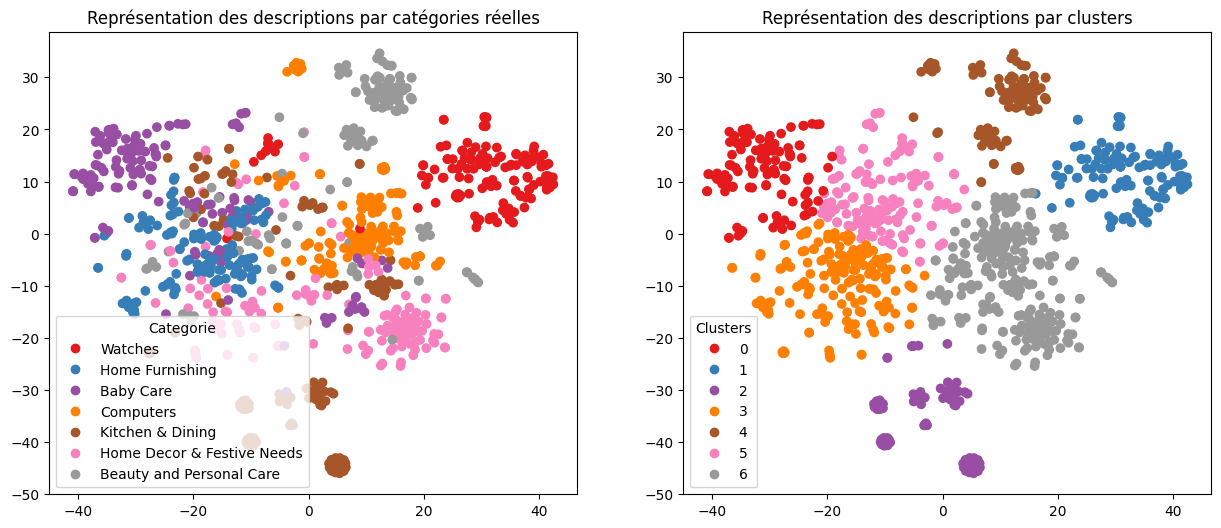

ARI :  0.3742


In [21]:
 TSNE_visu_fct(X_tsne, y_cat_num, cv_labels, ARI)

On peut voir que la catégorie Watches est très bien représentée avec nos features issues du CountVectorizer.  
Dans l'ensemble, le reste des catégories est correct pour une partie des descriptions mais une majorité reste mélangé autour du centre de notre visualisation T-SNE.  

### TF-idf

In [22]:
print("Tf-idf : ")
print("--------")
ARI, X_tsne, ctf_labels = ARI_fct(ctf_transform)

Tf-idf : 
--------
ARI :  0.4924 time :  5.0


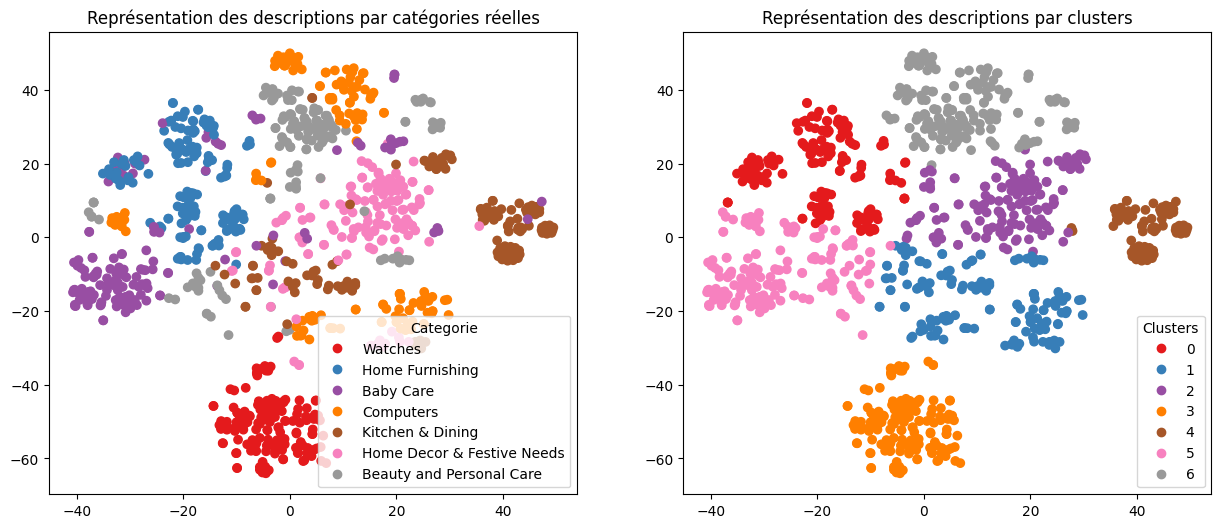

ARI :  0.4924


In [23]:
 TSNE_visu_fct(X_tsne, y_cat_num, ctf_labels, ARI)

Le Tf-idf est encore plus performant sur notre jeu de données, ici la plupart des catégories sont assez bien regroupées entre-elles.  
La visualisation et l'ARI de 0.49 permet déjà d'indiquer une faisaibilité de classification via la description.

## Word2Vec

Utilisation de Word2Vec pour créer une matrice d'embedding associant pour chaque mot de notre corpus un vecteur de taille définie (ici ce sera 300) pour "expliquer" le mot.  
On utilisera ensuite cette matrice pour "expliquer" nos descriptions entière en faisant un GlobalAveragePooling1D sur tous les mots d'une description, ce qui sortira un vecteur décrivant la description globale.

In [21]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import gensim

Initialisation des paramètres pour le modèle Word2Vec.

In [22]:
w2v_size=300
w2v_window=5
w2v_min_count=1
w2v_epochs=100
maxlen = 380 # adapt to length of sentences (379 in our case)
sentences = data_nlp['sentence_bow_lem'].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [23]:
# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=1)
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

Build & train Word2Vec model ...
Vocabulary size: 4712
Word2Vec trained


Test de la fonction most_similar sur le mot 'bed', on voit que le mot le plus proche est king, les description doivent souvent évoquer la taille 'king size' d'un lit.

In [29]:
model_vectors.most_similar('bed')

[('king', 0.5678360462188721),
 ('lxb', 0.5403295159339905),
 ('forward', 0.5349709987640381),
 ('solidwood', 0.5349159836769104),
 ('ordered', 0.5214898586273193),
 ('aware', 0.5176727771759033),
 ('crash', 0.5100772976875305),
 ('frog', 0.49725794792175293),
 ('sheet', 0.48293638229370117),
 ('razai', 0.48057445883750916)]

On prend notre variable sentences qui correspond à la liste des descriptions de notre corpus et on remplace chaque mot par sa représentation vectorielle.  
x_sentences est donc de taille 1050 (nombre de descriptions) x 380 (nombre de mots maximum dans une description (= maxlen)). Un padding est ajouté à la fin des phrases plus courte que 380 pour qu'elles fassent toute la meme taille, à savoir 380.

In [30]:
# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=maxlen,
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 4713


On crée la matrice d'embedding en se basant sur les vecteurs crées par le modèle Word2Vec.  
Nous avons 4713 mots dans le corpus donc la matrice est de taille 4713x300 (car nous avions choisis 300 comme taille de vecteur décrivant les mots).

In [31]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (4713, 300)


On crée désormais un réseau de neuronnes pour sortir un nouveau vecteur, toujours de taille 300 mais décrivant toute une phrase cette fois, dans notre cas, les descriptions.

In [32]:
# Création du modèle

input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 380)]             0         
                                                                 
 embedding (Embedding)       (None, 380, 300)          1413900   
                                                                 
 global_average_pooling1d (G  (None, 300)              0         
 lobalAveragePooling1D)                                          
                                                                 
Total params: 1,413,900
Trainable params: 1,413,900
Non-trainable params: 0
_________________________________________________________________


In [33]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

33/33 [==============================] - 0s 650us/step


(1050, 300)

In [34]:
ARI, X_tsne, labels = ARI_fct(embeddings)

ARI :  0.3335 time :  5.0


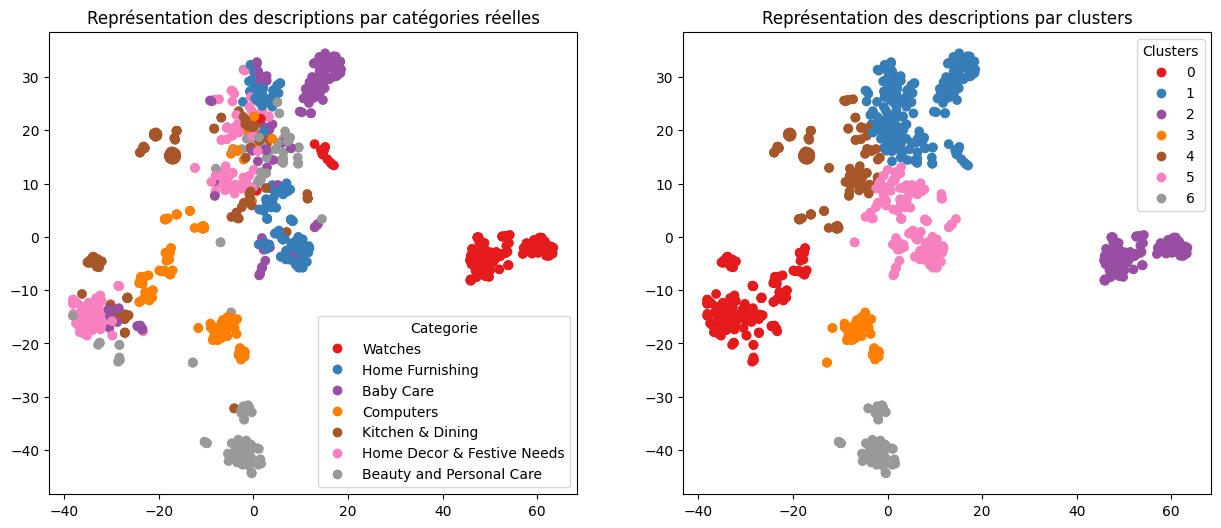

ARI :  0.3335


In [35]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

Le résultat se rapproche de celui qu'on avait avec un CountVectorizer, les watches sont bien identifiées mais pour les autres catégories, certanes descriptions sont correctement regroupées entre elles mais une grande partie se mélange.

## BERT

Utilisation de Bert pour tenter de nouveau de regrouper les descriptions en fonction des features trouvées par Bert.

In [36]:
# Bert
import transformers
from transformers import *

import tensorflow_hub as hub

os.environ["TF_KERAS"]='1'

C:\Users\olivi\miniconda3\envs\tf\lib\site-packages\transformers\deepspeed.py:23: FutureWarning: transformers.deepspeed module is deprecated and will be removed in a future version. Please import deepspeed modules directly from transformers.integrations
  warnings.warn(
C:\Users\olivi\miniconda3\envs\tf\lib\site-packages\transformers\generation_tf_utils.py:24: FutureWarning: Importing `TFGenerationMixin` from `src/transformers/generation_tf_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import TFGenerationMixin` instead.
  warnings.warn(


In [37]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

        
    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

In [38]:
data_nlp['sentence_dl'] = data_nlp['description'].apply(lambda x : transform_dl_fct(x))
data_nlp['length_dl'] = data_nlp['sentence_dl'].apply(lambda x : len(word_tokenize(x)))
print("max length dl : ", data_nlp['length_dl'].max())

data_nlp.head()

max length dl :  632


,product_category_tree,description,sentence_bow,sentence_bow_lem,length_bow,length_bow_lem,sentence_dl,length_dl
0,Home Furnishing,Key Features of Elegance Polyester Multicolor ...,key features elegance polyester multicolor abs...,key feature elegance polyester multicolor abst...,156,156,key features of elegance polyester multicolor ...,248
1,Baby Care,Specifications of Sathiyas Cotton Bath Towel (...,specifications sathiyas cotton bath towel bath...,specification sathiyas cotton bath towel bath ...,63,63,specifications of sathiyas cotton bath towel (...,84
2,Baby Care,Key Features of Eurospa Cotton Terry Face Towe...,key features eurospa cotton terry face towel s...,key feature eurospa cotton terry face towel se...,158,158,key features of eurospa cotton terry face towe...,252
3,Home Furnishing,Key Features of SANTOSH ROYAL FASHION Cotton P...,key features santosh royal fashion cotton prin...,key feature santosh royal fashion cotton print...,114,114,key features of santosh royal fashion cotton p...,148
4,Home Furnishing,Key Features of Jaipur Print Cotton Floral Kin...,key features jaipur print cotton floral king s...,key feature jaipur print cotton floral king si...,156,156,key features of jaipur print cotton floral kin...,228


In [39]:
max_length = 632
batch_size = 10
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
sentences = data_nlp['sentence_dl'].to_list()

In [40]:
# Création des features

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')

1/1 [==============================] - 0s 20ms/step
temps traitement :  50.0


In [41]:
ARI, X_tsne, labels = ARI_fct(features_bert)

ARI :  0.3018 time :  4.0


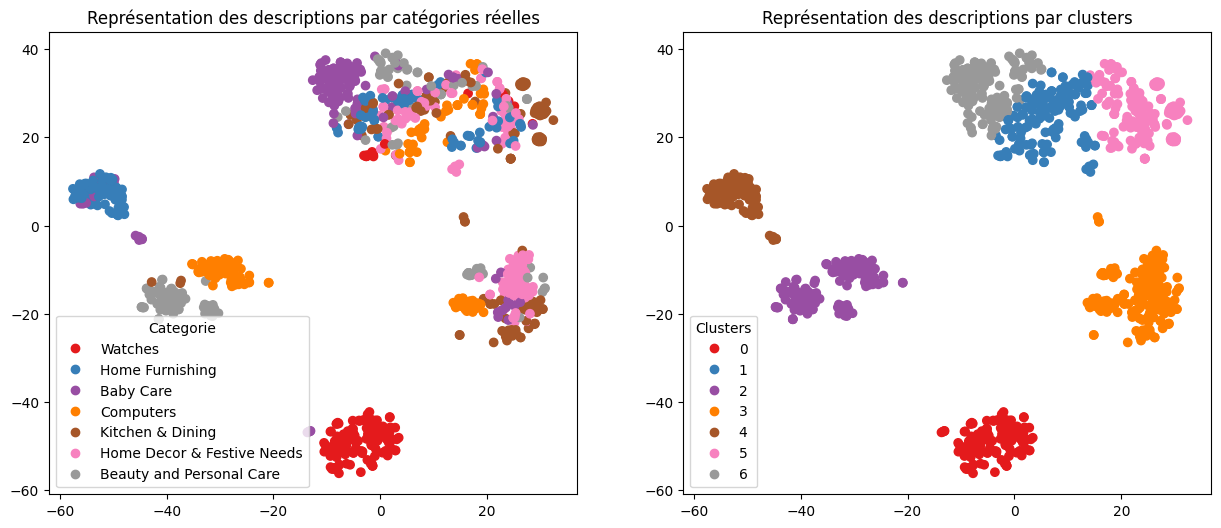

ARI :  0.3018


In [42]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

Le résultat est très bon pour certaines descriptions (une nouvelle fois Watches mais aussi Baby Care et une partie de Home Furnishing, de Beauty and Personal Care et de Computers).  
Par contre certaines catégories telle que Kitchen & Dining ne sont pas bien regroupées.  
Au final le score ARI n'est pas très bon : 0.3.  

## USE

Le modèle universal sentence encoder, contrairement aux précédents, travaille directement sur les phrases et non pas sur les mots.  

In [43]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step == 0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

In [44]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
batch_size = 10
sentences = data_nlp['sentence_dl'].to_list()

In [45]:
with tf.device('/CPU:0'):
    features_USE = feature_USE_fct(sentences, batch_size)

In [46]:
ARI, X_tsne, labels = ARI_fct(features_USE)

ARI :  0.4153 time :  4.0


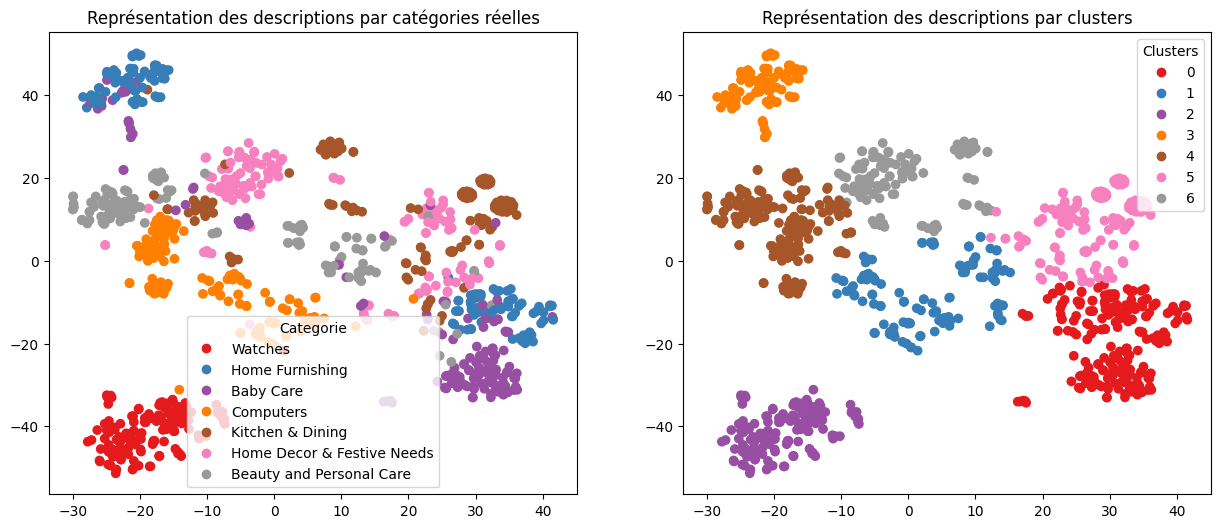

ARI :  0.4153


In [47]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

Le résultat est plutot bon, la plupart des catégories sont assez bien regroupées et peu se mélangent.

# Etude de faisabilité via l'image

In [48]:
data_pic = data_ALL[['product_category_tree', 'image']]
data_pic

,product_category_tree,image
0,Home Furnishing,55b85ea15a1536d46b7190ad6fff8ce7.jpg
1,Baby Care,7b72c92c2f6c40268628ec5f14c6d590.jpg
2,Baby Care,64d5d4a258243731dc7bbb1eef49ad74.jpg
3,Home Furnishing,d4684dcdc759dd9cdf41504698d737d8.jpg
4,Home Furnishing,6325b6870c54cd47be6ebfbffa620ec7.jpg
...,...,...
1045,Baby Care,958f54f4c46b53c8a0a9b8167d9140bc.jpg
1046,Baby Care,fd6cbcc22efb6b761bd564c28928483c.jpg
1047,Baby Care,5912e037d12774bb73a2048f35a00009.jpg
1048,Baby Care,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg


Enregistrement du dataframe en tant que csv, il nous sera utile pour la classification.

In [49]:
data_pic.to_csv('dataframe_pictures.csv', index=False)

In [50]:
list_photos = data_pic['image'].tolist()
print(len(list_photos))

1050


In [51]:
l_cat

['Watches',
 'Home Furnishing',
 'Baby Care',
 'Computers',
 'Kitchen & Dining',
 'Home Decor & Festive Needs',
 'Beauty and Personal Care']

Affichage de quelques images et leurs catégories associées.

Watches


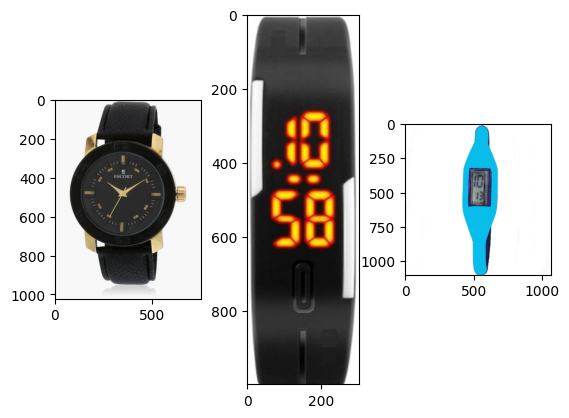

Home Furnishing


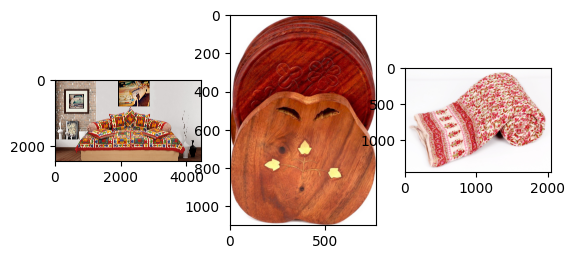

Baby Care


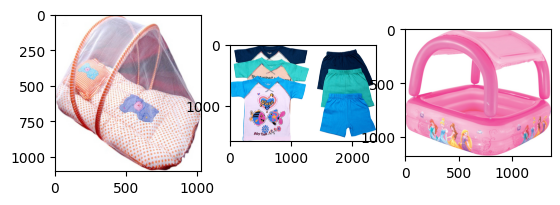

Computers


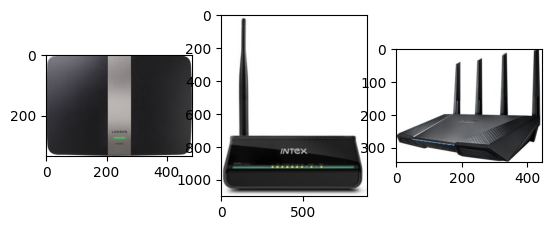

Kitchen & Dining


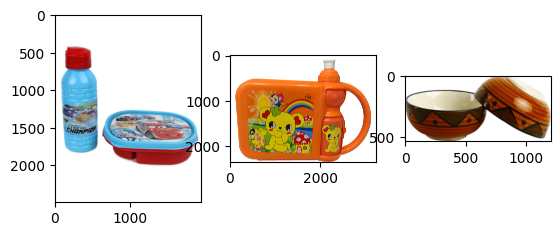

Home Decor & Festive Needs


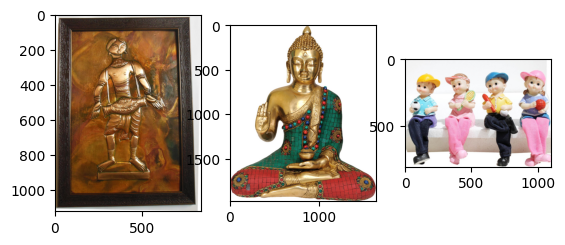

Beauty and Personal Care


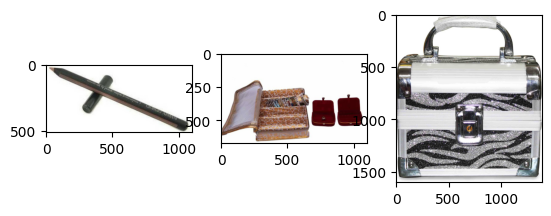

In [52]:
from matplotlib.image import imread

def list_fct(name) :
    list_image_name = [list_photos[i] for i in range(len(data_pic)) if data_pic["product_category_tree"][i]==name]
    return list_image_name

for name in l_cat :
    print(name)
    # print("-------")
    for i in range(3):
        plt.subplot(130 + 1 + i)
        filename = path_img + list_fct(name)[i+10]
        image = imread(filename)
        plt.imshow(image)
    plt.show()

## SIFT

Dans un premier temps, nous allons utiliser SIFT pour décrire les images et tenter de les regrouper correctement.

### Exemple pour une image : les keypoints et les descripteurs associés

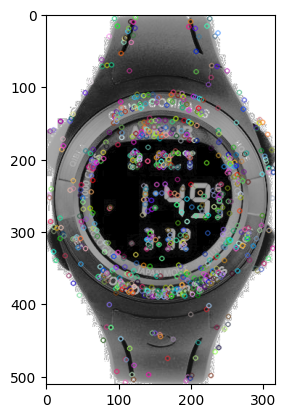

Descripteurs :  (832, 128)

[[  0.   0.   0. ...   0.   0.   0.]
 [166.  17.   0. ...   7.   2.   0.]
 [  1.   0.   0. ...   0.   0.  17.]
 ...
 [102.  36.   0. ...   6.  27.  10.]
 [115.   0.   0. ...   0.   0.   0.]
 [158.   6.   0. ...   0.   0.   0.]]


In [53]:
import cv2

sift = cv2.xfeatures2d.SIFT_create()
image = cv2.imread(path_img+list_photos[25],0) # convert in gray
image = cv2.equalizeHist(image)   # equalize image histogram
kp, des = sift.detectAndCompute(image, None)
img=cv2.drawKeypoints(image,kp,image)
plt.imshow(img)
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)


### Pré-traitement des images

Passage des images en gris et récupération de tous les descripteurs.

In [54]:
# identification of key points and associated descriptors
sift_keypoints = []
temps1=time.time()
sift = cv2.xfeatures2d.SIFT_create(500)

for image_num in range(len(list_photos)) :
    if image_num%150 == 0 : print(image_num)
    image = cv2.imread(path_img+list_photos[image_num],0) # convert in gray
    # image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    res = cv2.equalizeHist(image)   # equalize image histogram
    kp, des = sift.detectAndCompute(res, None)
    sift_keypoints.append(des)

sift_keypoints_by_img = np.asarray(sift_keypoints, dtype="object")
sift_keypoints_all    = np.concatenate(sift_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", sift_keypoints_all.shape)

duration1=time.time()-temps1
print("temps de traitement SIFT descriptor : ", "%15.2f" % duration1, "secondes")

0
150
300
450
600
750
900

Nombre de descripteurs :  (517351, 128)
temps de traitement SIFT descriptor :           253.73 secondes


Création des 7 clusters via MiniBatchKMeans sur tous nos descripteurs.

In [55]:
#from sklearn import cluster, metrics

# Determination number of clusters
temps1=time.time()

k = int(round(np.sqrt(len(sift_keypoints_all)),0))
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans.fit(sift_keypoints_all)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  719
Création de 719 clusters de descripteurs ...


C:\Users\olivi\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


temps de traitement kmeans :             6.78 secondes


### Création des features des images

In [56]:
# Creation of histograms (features)
temps1=time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(sift_keypoints_by_img) :
    if i%150 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")


0
150
300
450
600
750
900
temps de création histogrammes :             1.11 secondes


### Réductions de dimension

On utilise dans un premier temps une APC pour réduire les dimensions tout en gardant 99% de la variance epliquée. 

In [57]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 719)
Dimensions dataset après réduction PCA :  (1050, 495)


On fait ensuite une TSNE pour afficher les features en 2 dimensions.

In [58]:
tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = data_pic["product_category_tree"]
print(df_tsne.shape)

(1050, 3)


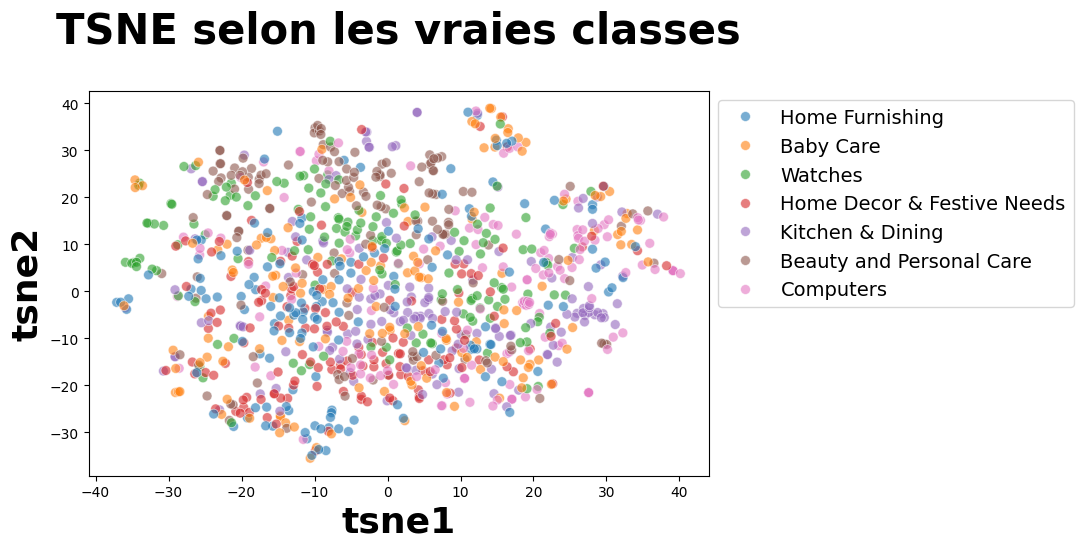

In [59]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}, bbox_to_anchor=(1.0, 1.0)) 

plt.show()


Comme on peut le voir, les catégories ne sont pas du tout regroupées, et semble être placées de manière aléatoire.

In [60]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)


(1050, 4)


C:\Users\olivi\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


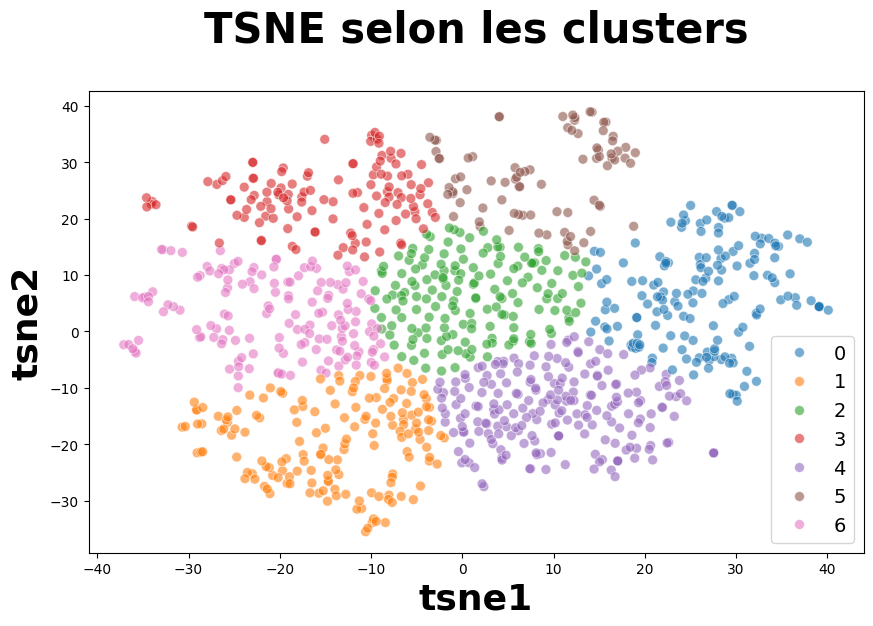

ARI :  0.047007530720696786


In [61]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

labels = y_cat_num
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

Logiquement, l'ARI est très faible entre les catégories réelles et celles trouvées via le KMeans.

In [62]:
df_tsne.groupby("cluster").count()["class"]

cluster
0    161
1    163
2    162
3    124
4    209
5     82
6    149
Name: class, dtype: int64

In [63]:
conf_mat = metrics.confusion_matrix(labels, cls.labels_)
print(conf_mat)

[[17  9 37 32 26  7 22]
 [16 35 20  7 19 12 41]
 [18 25 24 11 35 16 21]
 [60 12 13  9 36  7 13]
 [31 18 30  7 41 11 12]
 [ 8 49 15  4 38  6 30]
 [11 15 23 54 14 23 10]]


In [64]:
def conf_mat_transform(y_true,y_pred) :
    conf_mat = metrics.confusion_matrix(y_true,y_pred)
    
    #corresp = np.argmax(conf_mat, axis=0)
    corresp = [0, 3, 4, 1, 5, 2, 6]
    print ("Correspondance des clusters : ", corresp)
    # y_pred_transform = np.apply_along_axis(correspond_fct, 1, y_pred)
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    return labels['y_pred_transform']

cls_labels_transform = conf_mat_transform(labels, cls.labels_)
conf_mat = metrics.confusion_matrix(labels, cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(labels, cls_labels_transform))

Correspondance des clusters :  [0, 3, 4, 1, 5, 2, 6]
[[17 32  7  9 37 26 22]
 [16  7 12 35 20 19 41]
 [18 11 16 25 24 35 21]
 [60  9  7 12 13 36 13]
 [31  7 11 18 30 41 12]
 [ 8  4  6 49 15 38 30]
 [11 54 23 15 23 14 10]]

              precision    recall  f1-score   support

           0       0.11      0.11      0.11       150
           1       0.06      0.05      0.05       150
           2       0.20      0.11      0.14       150
           3       0.07      0.08      0.08       150
           4       0.19      0.20      0.19       150
           5       0.18      0.25      0.21       150
           6       0.07      0.07      0.07       150

    accuracy                           0.12      1050
   macro avg       0.12      0.12      0.12      1050
weighted avg       0.12      0.12      0.12      1050



<Axes: >

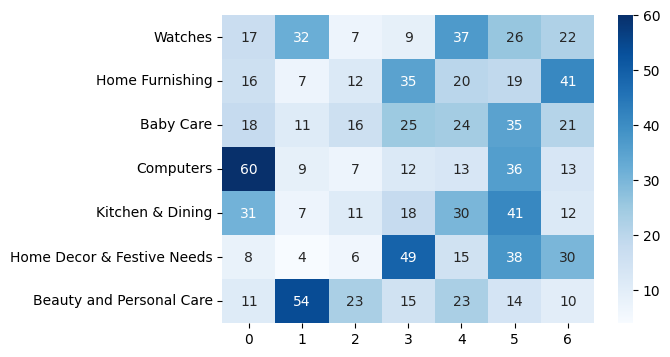

In [65]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in l_cat],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")

Il n'y a pas grand chose a tirer de note modèle SIFT, il n'est pas utilisable pour classifier nos images en catégories.

## CNN : VGG-16

Utilisation d'un modèle convolutif, le VGG-16.

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, roc_auc_score, roc_curve

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, GlobalAveragePooling1D, Flatten, Dense, Dropout 
from tensorflow.keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

In [67]:
print(f'Chemin des images : {path_img}')
print(f'Labels : {l_cat}')

data_pic

Chemin des images : Flipkart/Images/
Labels : ['Watches', 'Home Furnishing', 'Baby Care', 'Computers', 'Kitchen & Dining', 'Home Decor & Festive Needs', 'Beauty and Personal Care']


,product_category_tree,image
0,Home Furnishing,55b85ea15a1536d46b7190ad6fff8ce7.jpg
1,Baby Care,7b72c92c2f6c40268628ec5f14c6d590.jpg
2,Baby Care,64d5d4a258243731dc7bbb1eef49ad74.jpg
3,Home Furnishing,d4684dcdc759dd9cdf41504698d737d8.jpg
4,Home Furnishing,6325b6870c54cd47be6ebfbffa620ec7.jpg
...,...,...
1045,Baby Care,958f54f4c46b53c8a0a9b8167d9140bc.jpg
1046,Baby Care,fd6cbcc22efb6b761bd564c28928483c.jpg
1047,Baby Care,5912e037d12774bb73a2048f35a00009.jpg
1048,Baby Care,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg


### Récupération du modèle VGG-16 pré-entrainé

Le modèle VGG-16 complet permet de classifier une image parmis 1000 classes apprises lors de l'entrainement.  
Ce que nous voulons n'est pas ce résultat de classe mais les features finales des images pour nous les réprésenter visuellement et voir si une classification serait possible.  
On enlève donc le dernier layer pour avoir en sortis les features et non plus une classe.

In [68]:
base_model = VGG16()
model = Model(inputs=base_model.inputs, outputs=base_model.layers[-2].output)

print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

### Création des features des images

On passe nos images dans le bon format et on les rentre dans le modèle. 

In [69]:
images_features = []
i=0 
for image_file in data_pic["image"] :
    path_image = path_img + str(image_file)
    if i%100 == 0 : print(i)
    i +=1
    image = load_img(path_image, target_size=(224, 224))
    image = img_to_array(image) 
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)
    images_features.append(model.predict(image, verbose=0)[0]) # predict from pretrained model

images_features = np.asarray(images_features)
images_features.shape

0
100
200
300
400
500
600


C:\Users\olivi\AppData\Roaming\Python\Python310\site-packages\PIL\Image.py:3186: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


700
800
900
1000


(1050, 4096)

### Réduction des dimensions

Tout comme pour sift, on fait une première apc pour réduire le nombre de features puis un tsne pour l'affichage en 2 dimensions.

In [70]:
print(images_features.shape)
pca = decomposition.PCA(n_components=0.99, random_state=42)
feat_pca= pca.fit_transform(images_features)
print(feat_pca.shape)

(1050, 4096)
(1050, 803)


In [71]:
temps1 = time.time()

tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

duration1=time.time()-temps1
print("temps de T-SNE : ", "%15.2f" % duration1, "secondes")

temps de T-SNE :             3.58 secondes


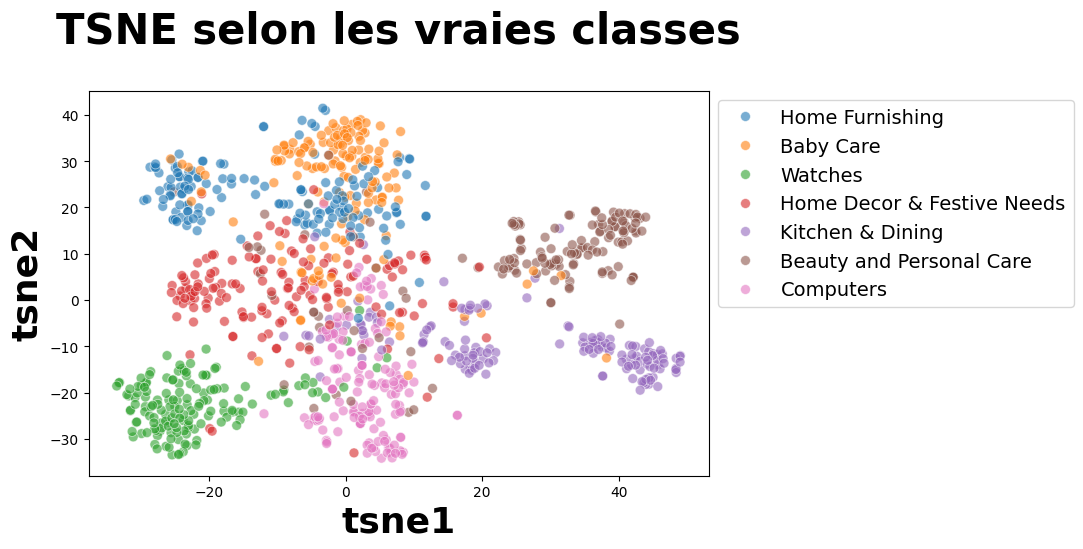

In [72]:
df_tsne = pd.DataFrame(X_tsne, columns=['tsne1', 'tsne2'])
df_tsne["class"] = data_pic["product_category_tree"]

plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="class",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}, bbox_to_anchor=(1.0, 1.0)) 

plt.show()


On voit directement que les catégories sont plutot bien regroupées, malgré quelques ambiguités au milieu.

In [73]:
cls = cluster.KMeans(n_clusters=7, n_init=100, random_state=42)
cls.fit(X_tsne)

KMeans(n_clusters=7, n_init=100, random_state=42)

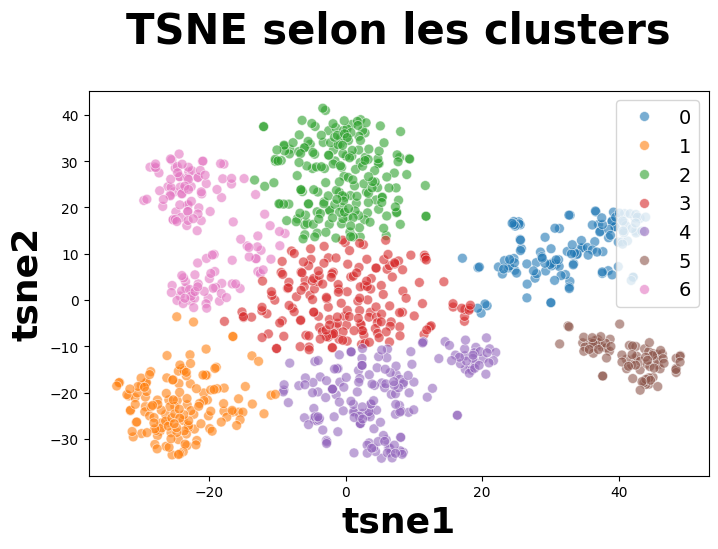

ARI :  0.450697437981499


In [74]:
df_tsne["cluster"] = cls.labels_

plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

labels = y_cat_num
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

L'ARI est de 0.45. On peut conclure que retrouvé la catégorie du produit à partir de l'image est faisable.

In [75]:
conf_mat = metrics.confusion_matrix(labels, cls.labels_)
print(conf_mat)

[[  0 135   0   2  13   0   0]
 [  0   0  78   5   0   0  67]
 [  4   1 109  25   1   1   9]
 [  0   1   1  35 113   0   0]
 [  6   0   1  30  35  78   0]
 [  1   8   4  77   6   0  54]
 [117   0   5  12   9   1   6]]


In [76]:
def conf_mat_transform(y_true,y_pred) :
    conf_mat = metrics.confusion_matrix(y_true,y_pred)
    
    corresp = np.argmax(conf_mat, axis=0)
    print ("Correspondance des clusters : ", corresp)
    #y_pred_transform = np.apply_along_axis(correspond_fct, 1, y_pred)
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    return labels['y_pred_transform']

In [77]:
cls_labels_transform = conf_mat_transform(labels, cls.labels_)
conf_mat = metrics.confusion_matrix(labels, cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(labels, cls_labels_transform))

Correspondance des clusters :  [6 0 2 5 3 4 1]
[[135   0   0  13   0   2   0]
 [  0  67  78   0   0   5   0]
 [  1   9 109   1   1  25   4]
 [  1   0   1 113   0  35   0]
 [  0   0   1  35  78  30   6]
 [  8  54   4   6   0  77   1]
 [  0   6   5   9   1  12 117]]

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       150
           1       0.49      0.45      0.47       150
           2       0.55      0.73      0.63       150
           3       0.64      0.75      0.69       150
           4       0.97      0.52      0.68       150
           5       0.41      0.51      0.46       150
           6       0.91      0.78      0.84       150

    accuracy                           0.66      1050
   macro avg       0.70      0.66      0.67      1050
weighted avg       0.70      0.66      0.67      1050



<Axes: >

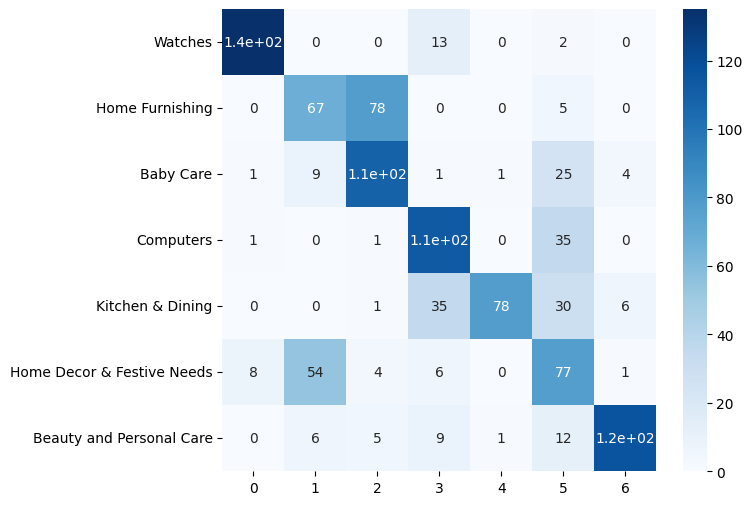

In [78]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in l_cat],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (7,6))
sns.heatmap(df_cm, annot=True, cmap="Blues")

On peut voir facilement grâce a la matrice de confusion les erreurs du modèle.  
Par exemple il classe un bon nombre de 'Home Decor & Festive Needs' en tant que 'Home Furnishing' ou encore certains 'Home Furnishing' en 'Baby Care'.